<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [47]:
import pandas as pd
import random
import numpy as np
import torch
def set_seed(seed=42):
    # 設置 Python 內建的 random 模組的隨機種子
    random.seed(seed)
    
    # 設置 NumPy 的隨機種子
    np.random.seed(seed)
    
    # 設置 PyTorch 的隨機種子
    torch.manual_seed(seed)
    
    # 如果使用 GPU，設置 CUDA 的隨機種子
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # 多 GPU 時使用

    # 保證 cuDNN 中的某些操作可重現
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)


df = pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [48]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [50]:
# checking for null values
df.isnull().sum()

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64

In [51]:
df = df.dropna()

In [52]:
df.shape

(270, 14)

In [53]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [54]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [55]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [56]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [57]:
split_point = int(np_data.shape[0]*0.7)

np_data = np_data.astype(np.float64)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [58]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [59]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [60]:
# Check your GPU status.
!nvidia-smi

Mon Apr 28 17:05:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.61                 Driver Version: 572.61         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   51C    P8             18W /  170W |    1116MiB /  12288MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [61]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100

model = Model()
#print(model)

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 0.9252, Train acc: 59.7884%, Val loss: 0.6232, Val acc: 65.4321%, Best Val loss: 0.6232 Best Val acc: 65.43%
Epoch 2/100, Train loss: 0.6916, Train acc: 61.9048%, Val loss: 0.6500, Val acc: 70.3704%, Best Val loss: 0.6232 Best Val acc: 70.37%
Epoch 3/100, Train loss: 0.6542, Train acc: 68.7831%, Val loss: 0.6114, Val acc: 64.1975%, Best Val loss: 0.6114 Best Val acc: 70.37%
Epoch 4/100, Train loss: 0.6087, Train acc: 65.6085%, Val loss: 0.6990, Val acc: 60.4938%, Best Val loss: 0.6114 Best Val acc: 70.37%


  4%|▍         | 4/100 [00:00<00:03, 29.30it/s]

Epoch 5/100, Train loss: 0.6450, Train acc: 65.0794%, Val loss: 0.5998, Val acc: 64.1975%, Best Val loss: 0.5998 Best Val acc: 70.37%
Epoch 6/100, Train loss: 0.5798, Train acc: 71.9577%, Val loss: 0.6174, Val acc: 69.1358%, Best Val loss: 0.5998 Best Val acc: 70.37%


  7%|▋         | 7/100 [00:00<00:03, 29.24it/s]

Epoch 7/100, Train loss: 0.5770, Train acc: 72.4868%, Val loss: 0.5919, Val acc: 64.1975%, Best Val loss: 0.5919 Best Val acc: 70.37%
Epoch 8/100, Train loss: 0.5775, Train acc: 70.8995%, Val loss: 0.6149, Val acc: 71.6049%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 9/100, Train loss: 0.5872, Train acc: 69.8413%, Val loss: 0.6637, Val acc: 62.9630%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 10/100, Train loss: 0.6551, Train acc: 66.6667%, Val loss: 0.6522, Val acc: 62.9630%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 11/100, Train loss: 0.6134, Train acc: 66.1376%, Val loss: 0.5983, Val acc: 70.3704%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 12/100, Train loss: 0.5879, Train acc: 69.3122%, Val loss: 0.6048, Val acc: 60.4938%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 13/100, Train loss: 0.5797, Train acc: 70.3704%, Val loss: 0.7190, Val acc: 60.4938%, Best Val loss: 0.5919 Best Val acc: 71.60%


 20%|██        | 20/100 [00:00<00:01, 71.11it/s]

Epoch 14/100, Train loss: 0.5796, Train acc: 69.3122%, Val loss: 0.6527, Val acc: 61.7284%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 15/100, Train loss: 0.5821, Train acc: 68.2540%, Val loss: 0.6740, Val acc: 64.1975%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 16/100, Train loss: 0.5636, Train acc: 71.4286%, Val loss: 0.5990, Val acc: 64.1975%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 17/100, Train loss: 0.5499, Train acc: 73.5450%, Val loss: 0.6517, Val acc: 62.9630%, Best Val loss: 0.5919 Best Val acc: 71.60%
Epoch 18/100, Train loss: 0.5578, Train acc: 70.3704%, Val loss: 0.5893, Val acc: 64.1975%, Best Val loss: 0.5893 Best Val acc: 71.60%
Epoch 19/100, Train loss: 0.5526, Train acc: 71.4286%, Val loss: 0.5874, Val acc: 70.3704%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 20/100, Train loss: 0.5908, Train acc: 69.8413%, Val loss: 0.6038, Val acc: 69.1358%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 21/100, Train loss: 0.5552, Train acc: 71.4286%, 

 34%|███▍      | 34/100 [00:00<00:00, 94.11it/s]

Epoch 34/100, Train loss: 0.5244, Train acc: 74.6032%, Val loss: 0.5887, Val acc: 66.6667%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 35/100, Train loss: 0.5271, Train acc: 73.0159%, Val loss: 0.6273, Val acc: 69.1358%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 36/100, Train loss: 0.5353, Train acc: 73.5450%, Val loss: 0.5932, Val acc: 69.1358%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 37/100, Train loss: 0.5317, Train acc: 74.0741%, Val loss: 0.5943, Val acc: 65.4321%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 38/100, Train loss: 0.5227, Train acc: 70.3704%, Val loss: 0.6095, Val acc: 66.6667%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 39/100, Train loss: 0.5136, Train acc: 74.6032%, Val loss: 0.5906, Val acc: 66.6667%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 40/100, Train loss: 0.5221, Train acc: 75.1323%, Val loss: 0.5896, Val acc: 66.6667%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 41/100, Train loss: 0.5119, Train acc: 76.1905%, 

 48%|████▊     | 48/100 [00:00<00:00, 107.61it/s]

Epoch 43/100, Train loss: 0.5105, Train acc: 73.0159%, Val loss: 0.6035, Val acc: 62.9630%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 44/100, Train loss: 0.5265, Train acc: 73.5450%, Val loss: 0.6440, Val acc: 65.4321%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 45/100, Train loss: 0.5267, Train acc: 76.1905%, Val loss: 0.5969, Val acc: 61.7284%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 46/100, Train loss: 0.5157, Train acc: 72.4868%, Val loss: 0.6257, Val acc: 70.3704%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 47/100, Train loss: 0.5498, Train acc: 68.7831%, Val loss: 0.5979, Val acc: 69.1358%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 48/100, Train loss: 0.5139, Train acc: 75.6614%, Val loss: 0.6022, Val acc: 67.9012%, Best Val loss: 0.5874 Best Val acc: 71.60%
Epoch 49/100, Train loss: 0.5012, Train acc: 76.7196%, Val loss: 0.5864, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 50/100, Train loss: 0.5109, Train acc: 74.0741%, 

 62%|██████▏   | 62/100 [00:00<00:00, 116.67it/s]

Epoch 63/100, Train loss: 0.5171, Train acc: 73.0159%, Val loss: 0.5901, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 64/100, Train loss: 0.5147, Train acc: 74.0741%, Val loss: 0.6144, Val acc: 67.9012%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 65/100, Train loss: 0.5398, Train acc: 70.8995%, Val loss: 0.5971, Val acc: 64.1975%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 66/100, Train loss: 0.5040, Train acc: 75.6614%, Val loss: 0.6265, Val acc: 69.1358%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 67/100, Train loss: 0.4944, Train acc: 75.1323%, Val loss: 0.5883, Val acc: 65.4321%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 68/100, Train loss: 0.5036, Train acc: 74.0741%, Val loss: 0.5895, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 69/100, Train loss: 0.4996, Train acc: 75.1323%, Val loss: 0.6075, Val acc: 67.9012%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 70/100, Train loss: 0.4900, Train acc: 77.2487%, 

 76%|███████▌  | 76/100 [00:00<00:00, 122.21it/s]

Epoch 72/100, Train loss: 0.4921, Train acc: 77.2487%, Val loss: 0.6041, Val acc: 70.3704%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 73/100, Train loss: 0.4917, Train acc: 75.1323%, Val loss: 0.5898, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 74/100, Train loss: 0.4903, Train acc: 76.1905%, Val loss: 0.5904, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 75/100, Train loss: 0.4880, Train acc: 75.6614%, Val loss: 0.5888, Val acc: 64.1975%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 76/100, Train loss: 0.4917, Train acc: 77.2487%, Val loss: 0.5920, Val acc: 69.1358%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 77/100, Train loss: 0.4896, Train acc: 77.2487%, Val loss: 0.5910, Val acc: 69.1358%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 78/100, Train loss: 0.4864, Train acc: 76.7196%, Val loss: 0.5872, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 79/100, Train loss: 0.4881, Train acc: 77.2487%, 

 90%|█████████ | 90/100 [00:00<00:00, 125.86it/s]

Epoch 91/100, Train loss: 0.4847, Train acc: 76.7196%, Val loss: 0.5877, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 92/100, Train loss: 0.4853, Train acc: 76.1905%, Val loss: 0.5877, Val acc: 66.6667%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 93/100, Train loss: 0.4857, Train acc: 75.6614%, Val loss: 0.5886, Val acc: 67.9012%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 94/100, Train loss: 0.4854, Train acc: 76.1905%, Val loss: 0.5887, Val acc: 67.9012%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 95/100, Train loss: 0.4852, Train acc: 76.7196%, Val loss: 0.5891, Val acc: 67.9012%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 96/100, Train loss: 0.4845, Train acc: 76.7196%, Val loss: 0.5892, Val acc: 69.1358%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 97/100, Train loss: 0.4855, Train acc: 76.7196%, Val loss: 0.5889, Val acc: 67.9012%, Best Val loss: 0.5864 Best Val acc: 71.60%
Epoch 98/100, Train loss: 0.4852, Train acc: 76.1905%, 

100%|██████████| 100/100 [00:00<00:00, 106.25it/s]


#### Visualizing the model performance

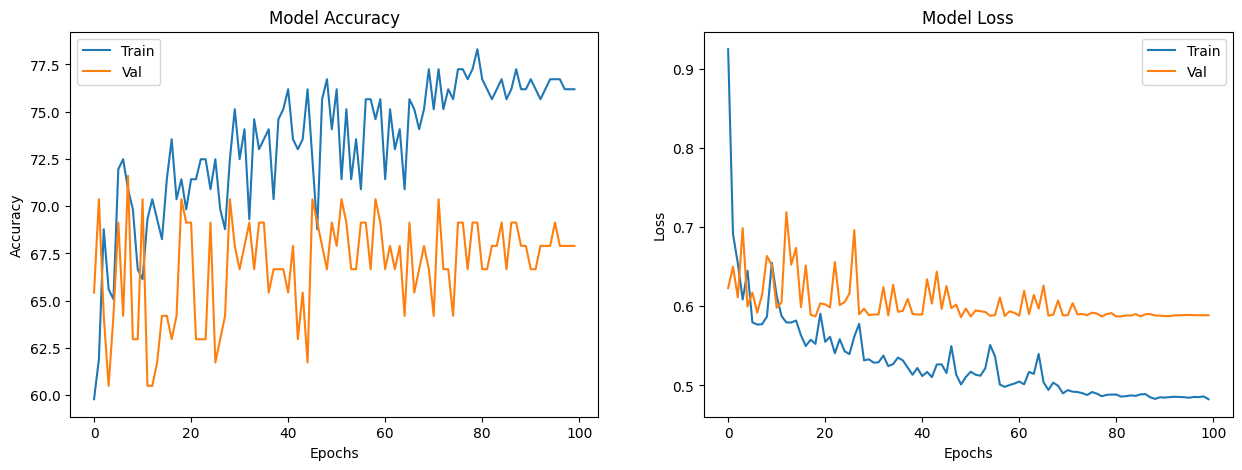

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [63]:
# read test file
test_data = pd.read_csv('heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [64]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [65]:
test_data = test_data.values
test_data.shape

(31, 14)

In [66]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [67]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0
total_loss = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

avg_train_loss = total_loss / len(test_loader)        

print(f'Test accuracy is {100. * test_correct / test_total}%')
print(f'Test loss is {avg_train_loss}')

Test accuracy is 58.064516129032256%
Test loss is 0.6806667250010275
